<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 [Pandas] 


## The Lusatania Dataset


*The RMS Lusitania was a British passenger liner launched in 1906 and sank by torpedo in 1915. The sinking of this ship is huge reason the US partnered with tje Britain and entered World War 1. This dataset is the passenger manifest at the time it sank.* 

**About the data:** 

<i>This 1962 record data set came from the [rms lusitania website](https://www.rmslusitania.info/people/statistics/). To make coding around that file easier, I slightly adjusted that excel file, turned it into a CSV, and put itup into my my [github repo](https://github.com/tonythor/cuny-datascience/blob/develop/data/lusitania_manifest.csv).


**Why is this interesting?**

<i>Not too long back I joined the Titanic and Lusitania datasets together. I was interested in knowing if social norms were differnet back then, and if it really was *women and children first. A much higher percentage of people died in the titanic compared to the Lusatania, that means that there were probably a litlte more sorting and self selection as to who each group wanted to survive. And back then, it did seem to me that that adage held true.</i>

*Here's that little study.*

[https://rpubs.com/tonythor/women-and-children-first](https://rpubs.com/tonythor/women-and-children-first)



**What are we doing in this workbook?**

<i>This isn't too complicated. We're going to break apart the dataset into groups, like wait staff versus maintenance, then normalize all those groups, and compare those groups with passangers. It'd be interesting to see which has a higher or lower survival rate.</i>



## Research Quesion 
**Were any classes or groups under or over represented with respect to fatalites?**

______________
## Data Exploration


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
usecols=['Fate', 'Department/Class', 'Passenger/Crew', 'Adult/Minor', 'Sex', 'Position']
cuny  = "https://raw.githubusercontent.com/tonythor/cuny-datascience"
lusitania = pd.read_csv(f"{cuny}/develop/data/lusitania_manifest.csv", usecols=usecols) #5
## rename all the columns, replace slashes and spaces with underscores.
lusitania.columns = lusitania.columns.str.lower().str.replace(' ', '_').str.replace('/', '_') #1, #9
lusitania['position'] = lusitania['position'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)


In [148]:
lusitania.head()

,fate,department_class,passenger_crew,position,adult_minor,sex
0,Lost,Band,Crew,NaN,Adult,Male
1,Lost,Band,Crew,NaN,Adult,Male
2,Saved,Band,Crew,Violin,Adult,Male
3,Saved,Band,Crew,Cello,Adult,Male
4,Saved,Band,Crew,Double Bass,Adult,Male


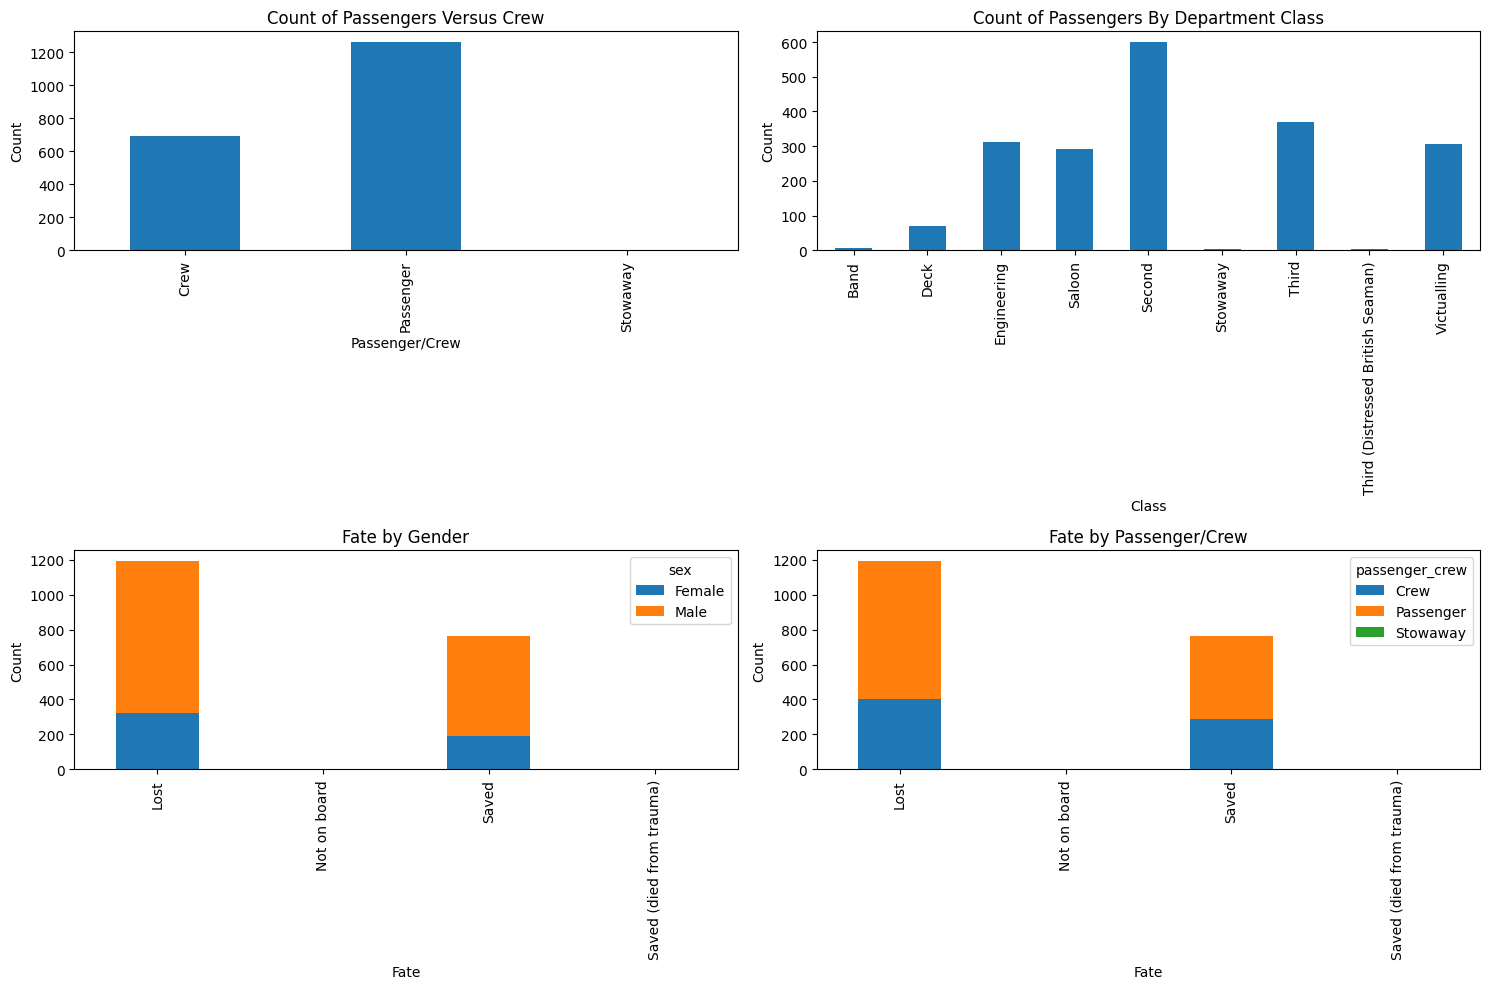

In [149]:
grouped_data1 = lusitania.groupby(['passenger_crew']).size()
grouped_data2 = lusitania.groupby(['department_class']).size()
grouped_data3 = lusitania.groupby(['fate', 'sex']).size().unstack()  
grouped_data4 = lusitania.groupby(['fate', 'passenger_crew']).size().unstack()  

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Top Left Chart
grouped_data1.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Count of Passengers Versus Crew')
axes[0, 0].set_xlabel('Passenger/Crew')
axes[0, 0].set_ylabel('Count')

# Top Right Chart
grouped_data2.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Count of Passengers By Department Class')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Count')

# Bottom Left Chart (Fate to Male/Female)
grouped_data3.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Fate by Gender')
axes[1, 0].set_xlabel('Fate')
axes[1, 0].set_ylabel('Count')

# Bottom Right Chart (Fate to Passenger/Crew)
grouped_data4.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Fate by Passenger/Crew')
axes[1, 1].set_xlabel('Fate')
axes[1, 1].set_ylabel('Count')

# Adjust the layout so that titles and labels don't overlap
plt.tight_layout()

# Show the plots
plt.show()

## Data Wrangling

Let's do our best to group the titles together and build a **staff_type** column before we try to generally visualize. Please keep in mind, a lot of these terms are 100 years old, so there might be some imperfect groupings.



In [150]:
band_members = ['Cello', 'Double Bass', 'Violin']

wait_staff = [
    'Assistant Deck Steward', 'Assistant Smokeroom Steward', 'Assistant Steward Waiter', 
    'Barkeeper', 'First Waiter', 'First Waiter Head Waiter', 'Library Steward', 'Linenkeeper', 'Lounge Steward', 
    'Pantry Steward', 'Saloon Cabin Bed Steward', 'Saloon Steward', 
    'Second Cabin Cabin Bed Steward', 'Second Steward', 'Second Waiter', 'Smokeroom Barkeeper', 
    'Smokeroom Steward', 'Stewards Boy', 'Third Waiter', 'Waiter', 
    'Assistant Engineers Mess Steward', 'Engineers Mess Steward', 'Barkeeper Smokeroom Second Cabin', 
    'Officers Mess Steward', 'Assistant Officers Mess Steward',    'Assistant Engineers Mess Steward', 
]

kitchen_staff = [
    'Assistant Baker', 'Assistant Butcher', 'Assistant Cook', 'Assistant Matron', 
    'Assistant Pantry Steward', 'Chief Baker', 'Chief Butcher', 'Chef', 
    'Confectioner', 'Extra Chief Steward', 'Extra Extra Second Baker', 'Extra Extra Second Cook', 
    'Extra Fourth Baker', 'Extra Second Baker', 'Extra Second Cook', 'Extra Third Baker', 
    'Extra Third Cook', 'Extra Vegetable Cook', 'Fourth Baker', 'Grill Cook', 'Kitchen Porter', 
    'Larder Cook', 'Night Firemans Cook', 'Passenger Cook', 'Roast Cook', 'Sauce Cook', 
    'Scullion', 'Second Baker', 'Second Butcher', 'Ships Cook', 'Soup Cook', 'Stewardess', 
    'Third Baker', 'Third Butcher', 'Third Cook', 'Vegetable Cook'
]

officers = [
     'Captain', 'Chief Officer', 'First Officer', 'Second Officer','Junior Third Officer',
    'Senior Third Officer', 'Second Officer', 'Staff Captain', 'Purser', 'Junior Assistant Purser',
    'Assistant Purser', 'Second Purser'
]

ship_crew = [
    'AbleBodied Seaman','O Seaman', 'Seaman', 
      'Night Watchman', 'Staff Captain'
]

maintenance_staff = [
    'Baggage Master', 'Boatswain', 'Boatswains Boy', 'Boatswains Mate', 
    'Carpenter', 'Donkeyman', 'Electric Attendant', 'Engineering Storekeeper', 
    'Greaser', 'Inspector', 'Joiner', 'Junior 4th Engineer', 'Junior 5th Engineer', 
    'Junior 6th Engineer', 'Junior 7th Engineer', 'MasteratArms', 'Plumber', 
    'Refrigeration Greaser', 'Senior Boilermaker', 'Steering Engineer', 
    'Trimmer', 'Trimmer promoted to Fireman', 'Ventilation Engineer',
    'Deck Steward', 'Deck Steward Second Cabin', 'Deck Steward Second Cabin', 
    'Assistant Steward', 'First Class Steward', 'Second Class Steward', 'Chief Steward Third Class',
    'Sculleryman', 'Chief Steward',  'Second Linenkeeper', 'Deck Engineer',
]

engineering_technical_staff = [
    'Chief Electrician', 'Chief Engineer', 'First Intermediate 3rd Engineer', 
    'First Junior 3rd Engineer', 'First Senior 3rd Engineer', 'Junior 2nd Engineer'
    'Intermediate 2nd Engineer', 'Intermediate 5th Engineer', 
    'Intermediate 6th Engineer', 'Second Electrician', 'Second Intermediate 3rd Engineer', 
    'Senior 2nd Engineer', 'Senior 4th Engineer', 'Senior 5th Engineer', 
    'Senior 6th Engineer', 'Senior 7th Engineer', 'Second Senior 3rd Engineer', 
    'Third Electrician', 'Third Junior 3rd Engineer', 'Third Senior 3rd Engineer',
    'Junior 2nd Engineer','Intermediate 2nd Engineer'
]

general_services = [
    'Barber', 'Boots Steward', 'Cellarman', 
    'Library Steward', 'Linenkeeper', 'Lounge Steward', 'Pantry Steward', 
    'Smokeroom Barkeeper', 'Smokeroom Steward', 'Typist','Interpreter', 'Storekeeper',
    'Ships Printer', 'Assistant Storekeeper', 'Engineers Store', 'Assistant Surgeon', 
    'Lift Attendant', 'Surgeon', 'Hospital Attendant', 'Matron', 'Telegraphist', 'Assistant Telegraphist',
    'Fireman',  'Leading Fireman',   
]


def get_staff_type(row):
    position = row['position']
    passenger_crew = row['passenger_crew']
    if pd.isna(position):  #2
        if passenger_crew == "Crew":
            return 'not_filled_out'
        elif passenger_crew == "Passenger":
            return 'not_staff'
    elif position in band_members:
        return 'band_member'
    elif position in officers:
        return 'officers'    
    elif position in kitchen_staff:
        return 'kitchen_staff'
    elif position in wait_staff:
        return 'wait_staff'
    elif position in ship_crew:
        return 'ship_crew'
    elif position in maintenance_staff:
        return 'maintenance_staff'
    elif position in engineering_technical_staff:
        return 'engineering_technical_staff'
    elif position in general_services:
        return 'general_services'
    else:
        return 'other_not_mapping' #3 -> though by now they were all fixed. 

lusitania['staff_type'] = lusitania.apply(get_staff_type, axis=1) #4 
lusitania.loc[lusitania['department_class'] == 'Band', 'staff_type'] = 'band'


In [137]:
lusitania

,fate,department_class,passenger_crew,position,adult_minor,sex,staff_type
0,Lost,Band,Crew,NaN,Adult,Male,band
1,Lost,Band,Crew,NaN,Adult,Male,band
2,Saved,Band,Crew,Violin,Adult,Male,band
3,Saved,Band,Crew,Cello,Adult,Male,band
4,Saved,Band,Crew,Double Bass,Adult,Male,band
...,...,...,...,...,...,...,...
1956,Saved,Victualling,Crew,Saloon Cabin Bed Steward,Adult,Male,wait_staff
1957,Lost,Victualling,Crew,Barkeeper Smokeroom Second Cabin,Adult,Male,wait_staff
1958,Lost,Victualling,Crew,Stewards Boy,Minor?,Male,wait_staff
1959,Saved,Victualling,Crew,Assistant Cook,Minor,Male,kitchen_staff


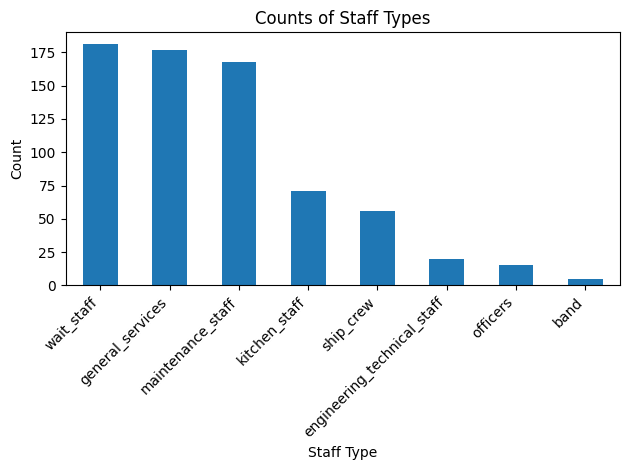

In [141]:
## A quick sanity check,

## This looks about like what I'd expect -- other than there should be more entertainers besides just the band. 
## Bands were the most iportant entertainment at that time, maybe with some occasional dance lessons, but there
## has always been international gambling as far as I know.

staff_type_counts = lusitania['staff_type'].value_counts().sort_values(ascending=False)
staff_type_counts = staff_type_counts[staff_type_counts.index != 'not_staff'] #8
staff_type_counts.plot(kind='bar')

# Set the title and labels
plt.title('Counts of Staff Types')
plt.xlabel('Staff Type')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()




## Visualizing the research question

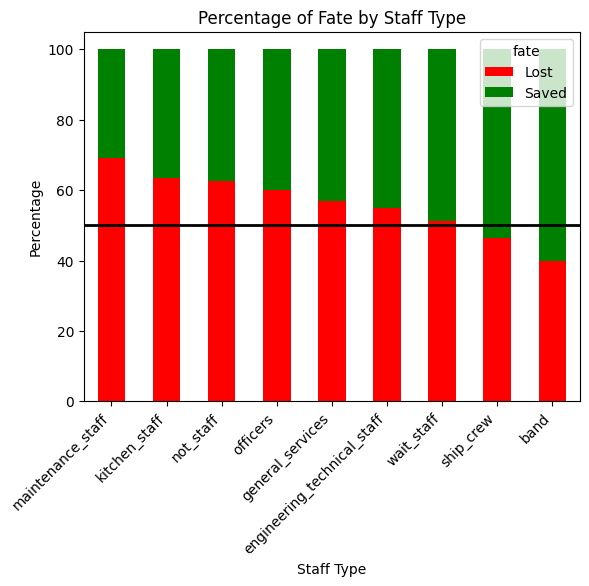

In [144]:
lusitania.loc[lusitania['fate'] == 'Saved (died from trauma)', 'fate'] = 'Lost'
filtered_lusitania = lusitania[lusitania['fate'].isin(['Lost', 'Saved'])] #6 -> this dropped a few rows 
filtered_lusitania
grouped = filtered_lusitania.groupby(['staff_type', 'fate']).size().reset_index(name='count') #11
pivot = grouped.pivot(index='staff_type', columns='fate', values='count').fillna(0)
pivot_total = pivot.sum(axis=1)
pivot_percentage = pivot.div(pivot_total, axis=0) * 100
pivot_percentage_sorted = pivot_percentage.sort_values(by='Lost', ascending=False) #7, #12
# Plot the sorted data
pivot_percentage_sorted.plot(kind='bar', stacked=True, color={'Lost': 'red', 'Saved': 'green'})
plt.title('Percentage of Fate by Staff Type')
plt.xlabel('Staff Type')
plt.ylabel('Percentage')
plt.axhline(y=50, color='black', linestyle='-', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusions  

One can see the chart and look at the groupings so we'll not repeat that, but there are three things that stand out to me.

1. Maintenance and kitchen staff were some of the lower paid and lower class positions.
2. I figure more of the officers would go down with the ship.
3. As an almost-professional dancer who's performed with jazz bands all over the world, for over 20 years, it maeks me happy that more of the band people lived.

If I were to keep going with this study, I think I'd look a little deeper into what I proposed, that there are some populations were more likely to live. 




## Wrangling Criteria

In the code above, you'll see little hash marks that denote which lines match to which of these.



1. Modify multiple column names.
2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.
3. Fix missing and invalid values in data.
4. Create new columns based on existing columns or calculations.
5. Drop column(s) from your dataset.
6. Drop a row(s) from your dataset.
7. Sort your data based on multiple variables. 
8. Filter your data based on some condition. 
9. Convert all the string values to upper or lower cases in one column.
10. Check whether numeric values are present in a given column of your dataframe.
11. Group your dataset by one column, and get the mean, min, and max values by group, groupby(), agg() or .apply()  **These were all string columns.I did group by, but min/max/stddev kind of column operations weren't really right**
13. Group your dataset by two columns and then sort the aggregated results within the groups. 